In [1]:
import plotly.plotly as py
from plotly.graph_objs import *

trace0 = Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = Data([trace0, trace1])

py.iplot(data, filename = 'basic-line')

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print __version__ # requires version >= 1.9.0

2.0.12


In [3]:
init_notebook_mode(connected=True)

In [4]:
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])

In [5]:
from plotly.graph_objs import *
import numpy as np

x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)


In [7]:
iplot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="hello world")
})

In [14]:

data = []

fill_color = '#66c2a5'
data.append(dict(
        type='scatter3d',
        mode='lines',
        x=np.arange(0, 10, 1),  # year loop: in incr. order then in decr. order then years[0]
        y=np.zeros(10),
        z=np.random.rand(10),
        name='',
        surfaceaxis=1, # add a surface axis ('1' refers to axes[1] i.e. the y-axis)
        surfacecolor=fill_color,
        line=dict(
            color='black',
            width=4
        ),
    ))

#fig = dict(data=data, layout=layout)

fig = dict(data=data)
iplot(fig, filename='filled-3d-lines')

In [11]:
np.random.rand(10)

array([ 0.47736862,  0.14357128,  0.43964564,  0.98473842,  0.9107893 ,
        0.25837225,  0.61958771,  0.33508829,  0.67431715,  0.55367152])

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import matrixDFT

In [16]:
def make1DGaussian(s, sigma, ctr=None, x0 = 0.):

    #HCH: what kind of normalization of Gaussian should I use? 

    if ctr is None:
        ctr = s/2.0 
    
    x = np.linspace(-ctr+0.5, s-ctr-0.5, s)
    
    deg = -np.pi/180.0    # minus sign seen here ... any reason?  anand

    #HCH: I may need to check about the rotation of the Gaussian...
    #semimajor, semiminor, theta = ellpars
    array = np.exp(-(x-x0)**2./(2.*sigma**2.))
    return x, array

----------------------------------
Change the sigma of Gaussians
Input Gaussian function:
sigma:10


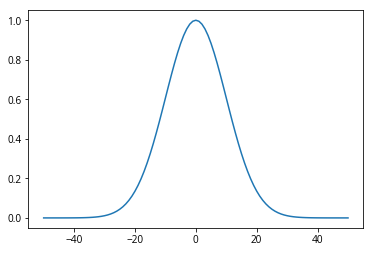

Output of Fourier transform:


/Users/Hwang/Library/Python/2.7/lib/python/site-packages/numpy/core/numeric.py:531: ComplexWarning:

Casting complex values to real discards the imaginary part



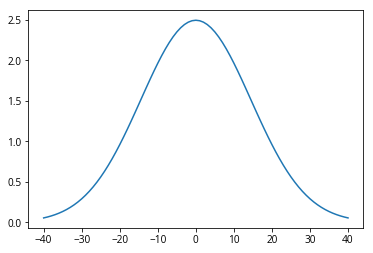

Input Gaussian function:
sigma:20


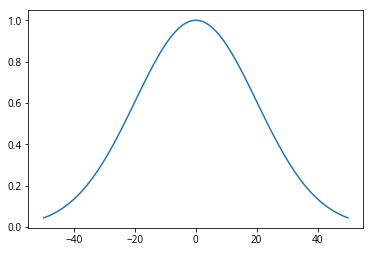

Output of Fourier transform:


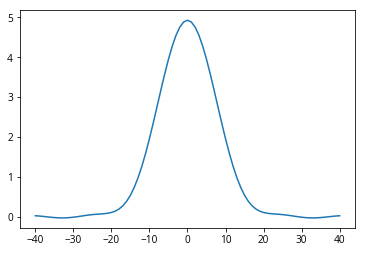

In [17]:
narray = 101
sigmas = [10, 20]

print '----------------------------------'
print 'Change the sigma of Gaussians'

for sigma in sigmas:

    x, gaussian_array = make1DGaussian(narray, sigma)


    print 'Input Gaussian function:'
    print 'sigma:' + str(sigma)
    plt.plot(x, gaussian_array)
    plt.show()
    #plt.savefig('test.png')

    #instantiate an mft object:
    #make it as 2D array
    gaussian_array = np.array([gaussian_array])
    ft = matrixDFT.MatrixFourierTransform()
    ft_gaussian = ft.perform(gaussian_array, 9, (1, 81))

    #HCH:to be checked the index of the output
    #xx = np.arange(81)
    xx = np.linspace(-40, 40, 81)
    print 'Output of Fourier transform:'
    plt.plot(xx, ft_gaussian[0])
    plt.show()

Input Gaussian function:
shift:0


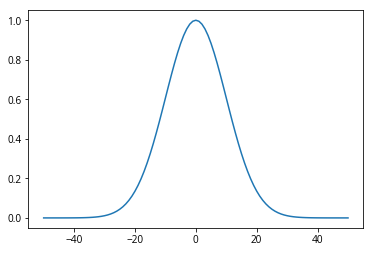

Output of Fourier transform:


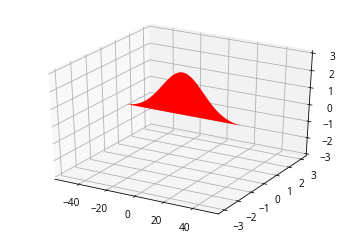

Input Gaussian function:
shift:10


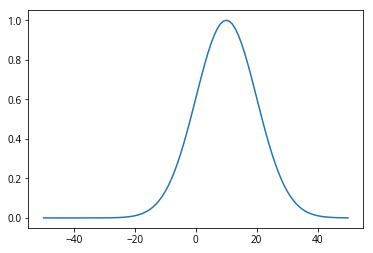

Output of Fourier transform:


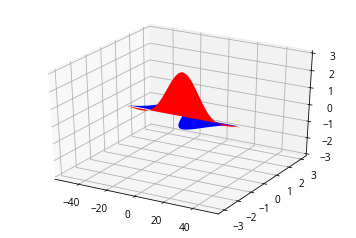

Input Gaussian function:
shift:20


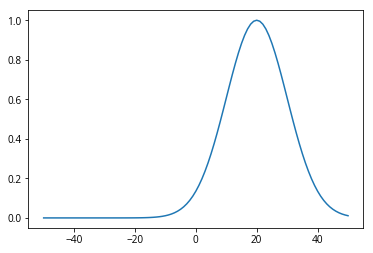

Output of Fourier transform:


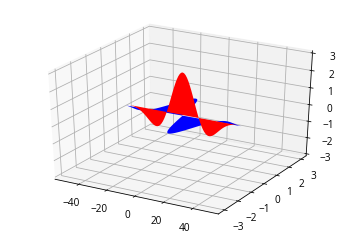

In [18]:
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.collections import PolyCollection

shifts = [0, 10, 20]
sigma = 10
for shift in shifts:

    ctr = (narray-1)/2.0 + shift
    x, gaussian_array = make1DGaussian(narray, sigma, x0 = shift)


    print 'Input Gaussian function:'
    print 'shift:' + str(shift)
    plt.plot(x, gaussian_array)
    plt.show()

    #instantiate an mft object:
    #make it as 2D array
    gaussian_array = np.array([gaussian_array])
    ft = matrixDFT.MatrixFourierTransform()
    ft_gaussian = ft.perform(gaussian_array, 9, (1, 81))

    #HCH:to be checked the index of the output
    #xx = np.arange(81)
    xx = np.linspace(-40, 40, 81)
    print 'Output of Fourier transform:'
    #plt.plot(xx, ft_gaussian[0])
    #fig = plt.figure()
    #ax = fig.gca(projection='3d')
    fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    ax = fig.gca(projection='3d')
    #ax.plot(xx, np.zeros_like(xx), ft_gaussian[0].real)
    #ax.plot(xx, ft_gaussian[0].imag, np.zeros_like(xx))
    poly_real = PolyCollection([zip(xx, ft_gaussian[0].real)], facecolors=['r'])
    poly_imag = PolyCollection([zip(xx, ft_gaussian[0].imag)], facecolors=['b'])

    ax.add_collection3d(poly_imag, zs=[0.0], zdir='z')
    ax.add_collection3d(poly_real, zs=[0.0], zdir='y')
    ax.auto_scale_xyz([-50, 50], [-3.0, 3.0], [-3.0, 3.0])
    #ax.set_axis_off()
    #image_intensity = (imagefield*imagefield.conj()).real
    plt.show()


In [27]:
data = []
num_data = ft_gaussian[0].size
fill_color = '#66c2a5'
data.append(dict(
        type='scatter3d',
        mode='lines',
        x=xx,  # year loop: in incr. order then in decr. order then years[0]
        y=np.zeros(num_data),
        z=ft_gaussian[0].real,
        name='',
        surfaceaxis=1, # add a surface axis ('1' refers to axes[1] i.e. the y-axis)
        surfacecolor=fill_color,
        line=dict(
            color='black',
            width=4
        ),
    ))

data.append(dict(
        type='scatter3d',
        mode='lines',
        x=xx,  # year loop: in incr. order then in decr. order then years[0]
        y=ft_gaussian[0].imag,
        z=np.zeros(num_data),
        name='',
        fill='tozeroy'
        surfaceaxis=2, # add a surface axis ('1' refers to axes[1] i.e. the y-axis)
        surfacecolor=fill_color,
        line=dict(
            color='red',
            width=4
        ),
    ))

#fig = dict(data=data, layout=layout)

fig = dict(data=data)
iplot(fig)

In [51]:
import plotly
import plotly.graph_objs as go
import numpy as np
traces = []

# Drawing figure by convex (faster than drawing line by line)
def getConvexData(x_data, y_data, z_data):
    start, end = 0, 0
    flag = y_data[0]
    while end != len(x_data):
        if y_data[end] * flag <= 0 or end == len(x_data) - 1:
            # Append missing point to the start, end using vertical 
            # line as approximation
            x = [x_data[start]] + list(x_data[start:end]) + [x_data[end]]
            y = [0] + list(y_data[start:end]) + [0]
            z = [0] + list(z_data[start:end]) + [0]
            yield x, y, z
            flag = y_data[end]
            start = end
        end += 1
# Draw Sine line in x-y plane
x_data = np.arange(0, 10, 0.01)
y_data = np.sin(x_data)
z_data = np.zeros(x_data.shape)
for x, y, z in getConvexData(x_data, y_data, z_data):
    traces.append(go.Scatter3d(x=x, y=y, z=z, mode="lines", 
                               surfacecolor='red', surfaceaxis=2))
# Draw Cosine line in x-z plane
x_data = np.arange(0, 10, 0.01)
y_data = np.cos(x_data)
z_data = np.zeros(x_data.shape)
for x, z, y in getConvexData(x_data, y_data, z_data):
    traces.append(go.Scatter3d(x=x, y=y, z=z, mode="lines", 
                               surfacecolor='blue', surfaceaxis=1))

# Drawing the figure line by line
# import math
# for i in np.arange(0, 10, 0.01):
#     x = [i, i]
#     y = [0, math.sin(i)]
#     z = [0, 0]
#     traces.append(
#         go.Scatter3d(x=x, y=y, z=z, marker=dict(opacity=1), 
#                      mode='lines', line=dict(color='black'))
#     )

# for i in np.arange(0, 10, 0.01):
#     x = [i, i]
#     y = [0, 0]
#     z = [0, math.cos(i)]
#     traces.append(
#         go.Scatter3d(x=x, y=y, z=z, marker=dict(opacity=1), 
#                      mode='lines', line=dict(color='blue'))
#     )
fig = go.Figure(data=traces, layout=go.Layout(
    showlegend=False,
))
#plotly.offline.plot(fig, filename='ribbon-plot-python')
iplot(fig)

In [72]:
traces = []



num_data = xx.size


x_data = xx
#y_data = ft_gaussian[0].imag
y_data = ft_gaussian[0].real
z_data = np.zeros(num_data)
for x, z, y in getConvexData(x_data, y_data, z_data):
    traces.append(go.Scatter3d(x=x, y=y, z=z, mode="lines", 
                               surfacecolor='blue', surfaceaxis=1,  opacity=0.5))


x_data = xx

y_data = ft_gaussian[0].imag
#y_data = np.sin(0.2*xx)
z_data = np.zeros(num_data)

for x, y, z in getConvexData(x_data, y_data, z_data):
    traces.append(go.Scatter3d(x=x, y=y, z=z, mode="lines", 
                               surfacecolor='red', surfaceaxis=2))

    
    
    
x_data = xx
#y_data = ft_gaussian[0].imag
z_data = ft_gaussian[0].real
y_data = ft_gaussian[0].imag
"""
for x, z, y in getConvexData(x_data, y_data, z_data):
    traces.append(go.Scatter3d(x=x, y=y, z=z, mode="lines", 
                               surfacecolor='blue', surfaceaxis=1))
"""

traces.append(go.Scatter3d(x=x_data, y=y_data, z=z_data, mode="lines", 
        line=dict(
        color='cyan',
        width=3
    )))


#fig = go.Figure(data=dots, layout=go.Layout(
#    showlegend=False,
#))
    
    
    
fig = go.Figure(data=traces, layout=go.Layout(
    showlegend=False,
))
#plotly.offline.plot(fig, filename='ribbon-plot-python')

iplot(fig)

In [61]:
dots = []



num_data = xx.size


x_data = xx
#y_data = ft_gaussian[0].imag
z_data = ft_gaussian[0].real
y_data = ft_gaussian[0].imag
"""
for x, z, y in getConvexData(x_data, y_data, z_data):
    traces.append(go.Scatter3d(x=x, y=y, z=z, mode="lines", 
                               surfacecolor='blue', surfaceaxis=1))
"""

dots.append(go.Scatter3d(x=x_data, y=y_data, z=z_data, mode="lines"))

fig = go.Figure(data=dots, layout=go.Layout(
    showlegend=False,
))
#plotly.offline.plot(fig, filename='ribbon-plot-python')

iplot(fig)